# EDA: Machine Learning and Credit Default

#### Thomas Birkner, Tom O'Connell, Theyab Alrashdi

 The data that we use is from the Home Credit dataset on Kaggle. Home Credit is a international consumer finance provider in Europe who focuses on providing loan opportunities for consumers with limited access to traditional banking. The main datasets we will be exploring are application_train and application_test which have been pre split with application_train containing the target feature which is whether or not they will default. The data sets include all of the static data for each loan application at Home Credit.


In [1]:
import pandas as pandas
pandas.set_option('display.max_columns', None)
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

c:\Users\14804\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


The application_train dataset contains 122 total features and 307511 instances.

In [2]:
#Read in dataset and create dataframe
application_training_df= pandas.read_csv('application_train.csv')
application_testing_df=pandas.read_csv('application_test.csv')
application_training_df.head()

application_training_df.shape

(307511, 122)

Lets begin the cleaning process for the dataset and check for missing values

In [3]:
#Check for missing data
Null_count=application_training_df.isnull().sum()

for column, Null_count in Null_count.items():
    print(f'{column}: {Null_count}')

SK_ID_CURR: 0
TARGET: 0
NAME_CONTRACT_TYPE: 0
CODE_GENDER: 0
FLAG_OWN_CAR: 0
FLAG_OWN_REALTY: 0
CNT_CHILDREN: 0
AMT_INCOME_TOTAL: 0
AMT_CREDIT: 0
AMT_ANNUITY: 12
AMT_GOODS_PRICE: 278
NAME_TYPE_SUITE: 1292
NAME_INCOME_TYPE: 0
NAME_EDUCATION_TYPE: 0
NAME_FAMILY_STATUS: 0
NAME_HOUSING_TYPE: 0
REGION_POPULATION_RELATIVE: 0
DAYS_BIRTH: 0
DAYS_EMPLOYED: 0
DAYS_REGISTRATION: 0
DAYS_ID_PUBLISH: 0
OWN_CAR_AGE: 202929
FLAG_MOBIL: 0
FLAG_EMP_PHONE: 0
FLAG_WORK_PHONE: 0
FLAG_CONT_MOBILE: 0
FLAG_PHONE: 0
FLAG_EMAIL: 0
OCCUPATION_TYPE: 96391
CNT_FAM_MEMBERS: 2
REGION_RATING_CLIENT: 0
REGION_RATING_CLIENT_W_CITY: 0
WEEKDAY_APPR_PROCESS_START: 0
HOUR_APPR_PROCESS_START: 0
REG_REGION_NOT_LIVE_REGION: 0
REG_REGION_NOT_WORK_REGION: 0
LIVE_REGION_NOT_WORK_REGION: 0
REG_CITY_NOT_LIVE_CITY: 0
REG_CITY_NOT_WORK_CITY: 0
LIVE_CITY_NOT_WORK_CITY: 0
ORGANIZATION_TYPE: 0
EXT_SOURCE_1: 173378
EXT_SOURCE_2: 660
EXT_SOURCE_3: 60965
APARTMENTS_AVG: 156061
BASEMENTAREA_AVG: 179943
YEARS_BEGINEXPLUATATION_AVG: 150007
Y

The nulls in the data will need to be filled to prepare for machine learning and exploratory data analysis. We have decided to fill all of the numerical features using the median and the categoricals using the most frequent, which takes the value that is the most frequent and fills it in using that.

In [4]:
# Identify numerical and categorical features
numerical_features = application_training_df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = application_training_df.select_dtypes(include=['object']).columns

# Fill missing values for numerical features using simple imputer
numerical_imputer = SimpleImputer(strategy='median') 
application_training_df[numerical_features] = numerical_imputer.fit_transform(application_training_df[numerical_features])

# Fill missing values for categorical features using simple imputer
categorical_imputer = SimpleImputer(strategy='most_frequent')  
application_training_df[categorical_features] = categorical_imputer.fit_transform(application_training_df[categorical_features])


Verify and check to see if there are any nulls

In [5]:
Null_count=application_training_df.isnull().sum()

for column, Null_count in Null_count.items():
    print(f'{column}: {Null_count}')

SK_ID_CURR: 0
TARGET: 0
NAME_CONTRACT_TYPE: 0
CODE_GENDER: 0
FLAG_OWN_CAR: 0
FLAG_OWN_REALTY: 0
CNT_CHILDREN: 0
AMT_INCOME_TOTAL: 0
AMT_CREDIT: 0
AMT_ANNUITY: 0
AMT_GOODS_PRICE: 0
NAME_TYPE_SUITE: 0
NAME_INCOME_TYPE: 0
NAME_EDUCATION_TYPE: 0
NAME_FAMILY_STATUS: 0
NAME_HOUSING_TYPE: 0
REGION_POPULATION_RELATIVE: 0
DAYS_BIRTH: 0
DAYS_EMPLOYED: 0
DAYS_REGISTRATION: 0
DAYS_ID_PUBLISH: 0
OWN_CAR_AGE: 0
FLAG_MOBIL: 0
FLAG_EMP_PHONE: 0
FLAG_WORK_PHONE: 0
FLAG_CONT_MOBILE: 0
FLAG_PHONE: 0
FLAG_EMAIL: 0
OCCUPATION_TYPE: 0
CNT_FAM_MEMBERS: 0
REGION_RATING_CLIENT: 0
REGION_RATING_CLIENT_W_CITY: 0
WEEKDAY_APPR_PROCESS_START: 0
HOUR_APPR_PROCESS_START: 0
REG_REGION_NOT_LIVE_REGION: 0
REG_REGION_NOT_WORK_REGION: 0
LIVE_REGION_NOT_WORK_REGION: 0
REG_CITY_NOT_LIVE_CITY: 0
REG_CITY_NOT_WORK_CITY: 0
LIVE_CITY_NOT_WORK_CITY: 0
ORGANIZATION_TYPE: 0
EXT_SOURCE_1: 0
EXT_SOURCE_2: 0
EXT_SOURCE_3: 0
APARTMENTS_AVG: 0
BASEMENTAREA_AVG: 0
YEARS_BEGINEXPLUATATION_AVG: 0
YEARS_BUILD_AVG: 0
COMMONAREA_AVG: 0
ELEVA

Plot the numerical distributions of some features

C:\Users\14804\AppData\Local\Temp\ipykernel_22872\2770857348.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  num_df.hist(bins=30, ax=ax1)


array([[<AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>],
       [<AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>],
       [<AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>]], dtype=object)

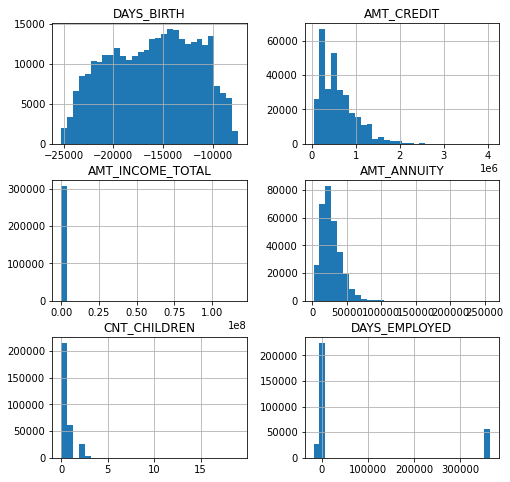

In [6]:
num_df=application_training_df[['DAYS_BIRTH', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY','CNT_CHILDREN', 'DAYS_EMPLOYED']]

fig, ax1 = plt.subplots(1,1, figsize=(8, 8))

num_df.hist(bins=30, ax=ax1)

Lets explore the correlations using a heatmap of the 20 features with highest correlation.

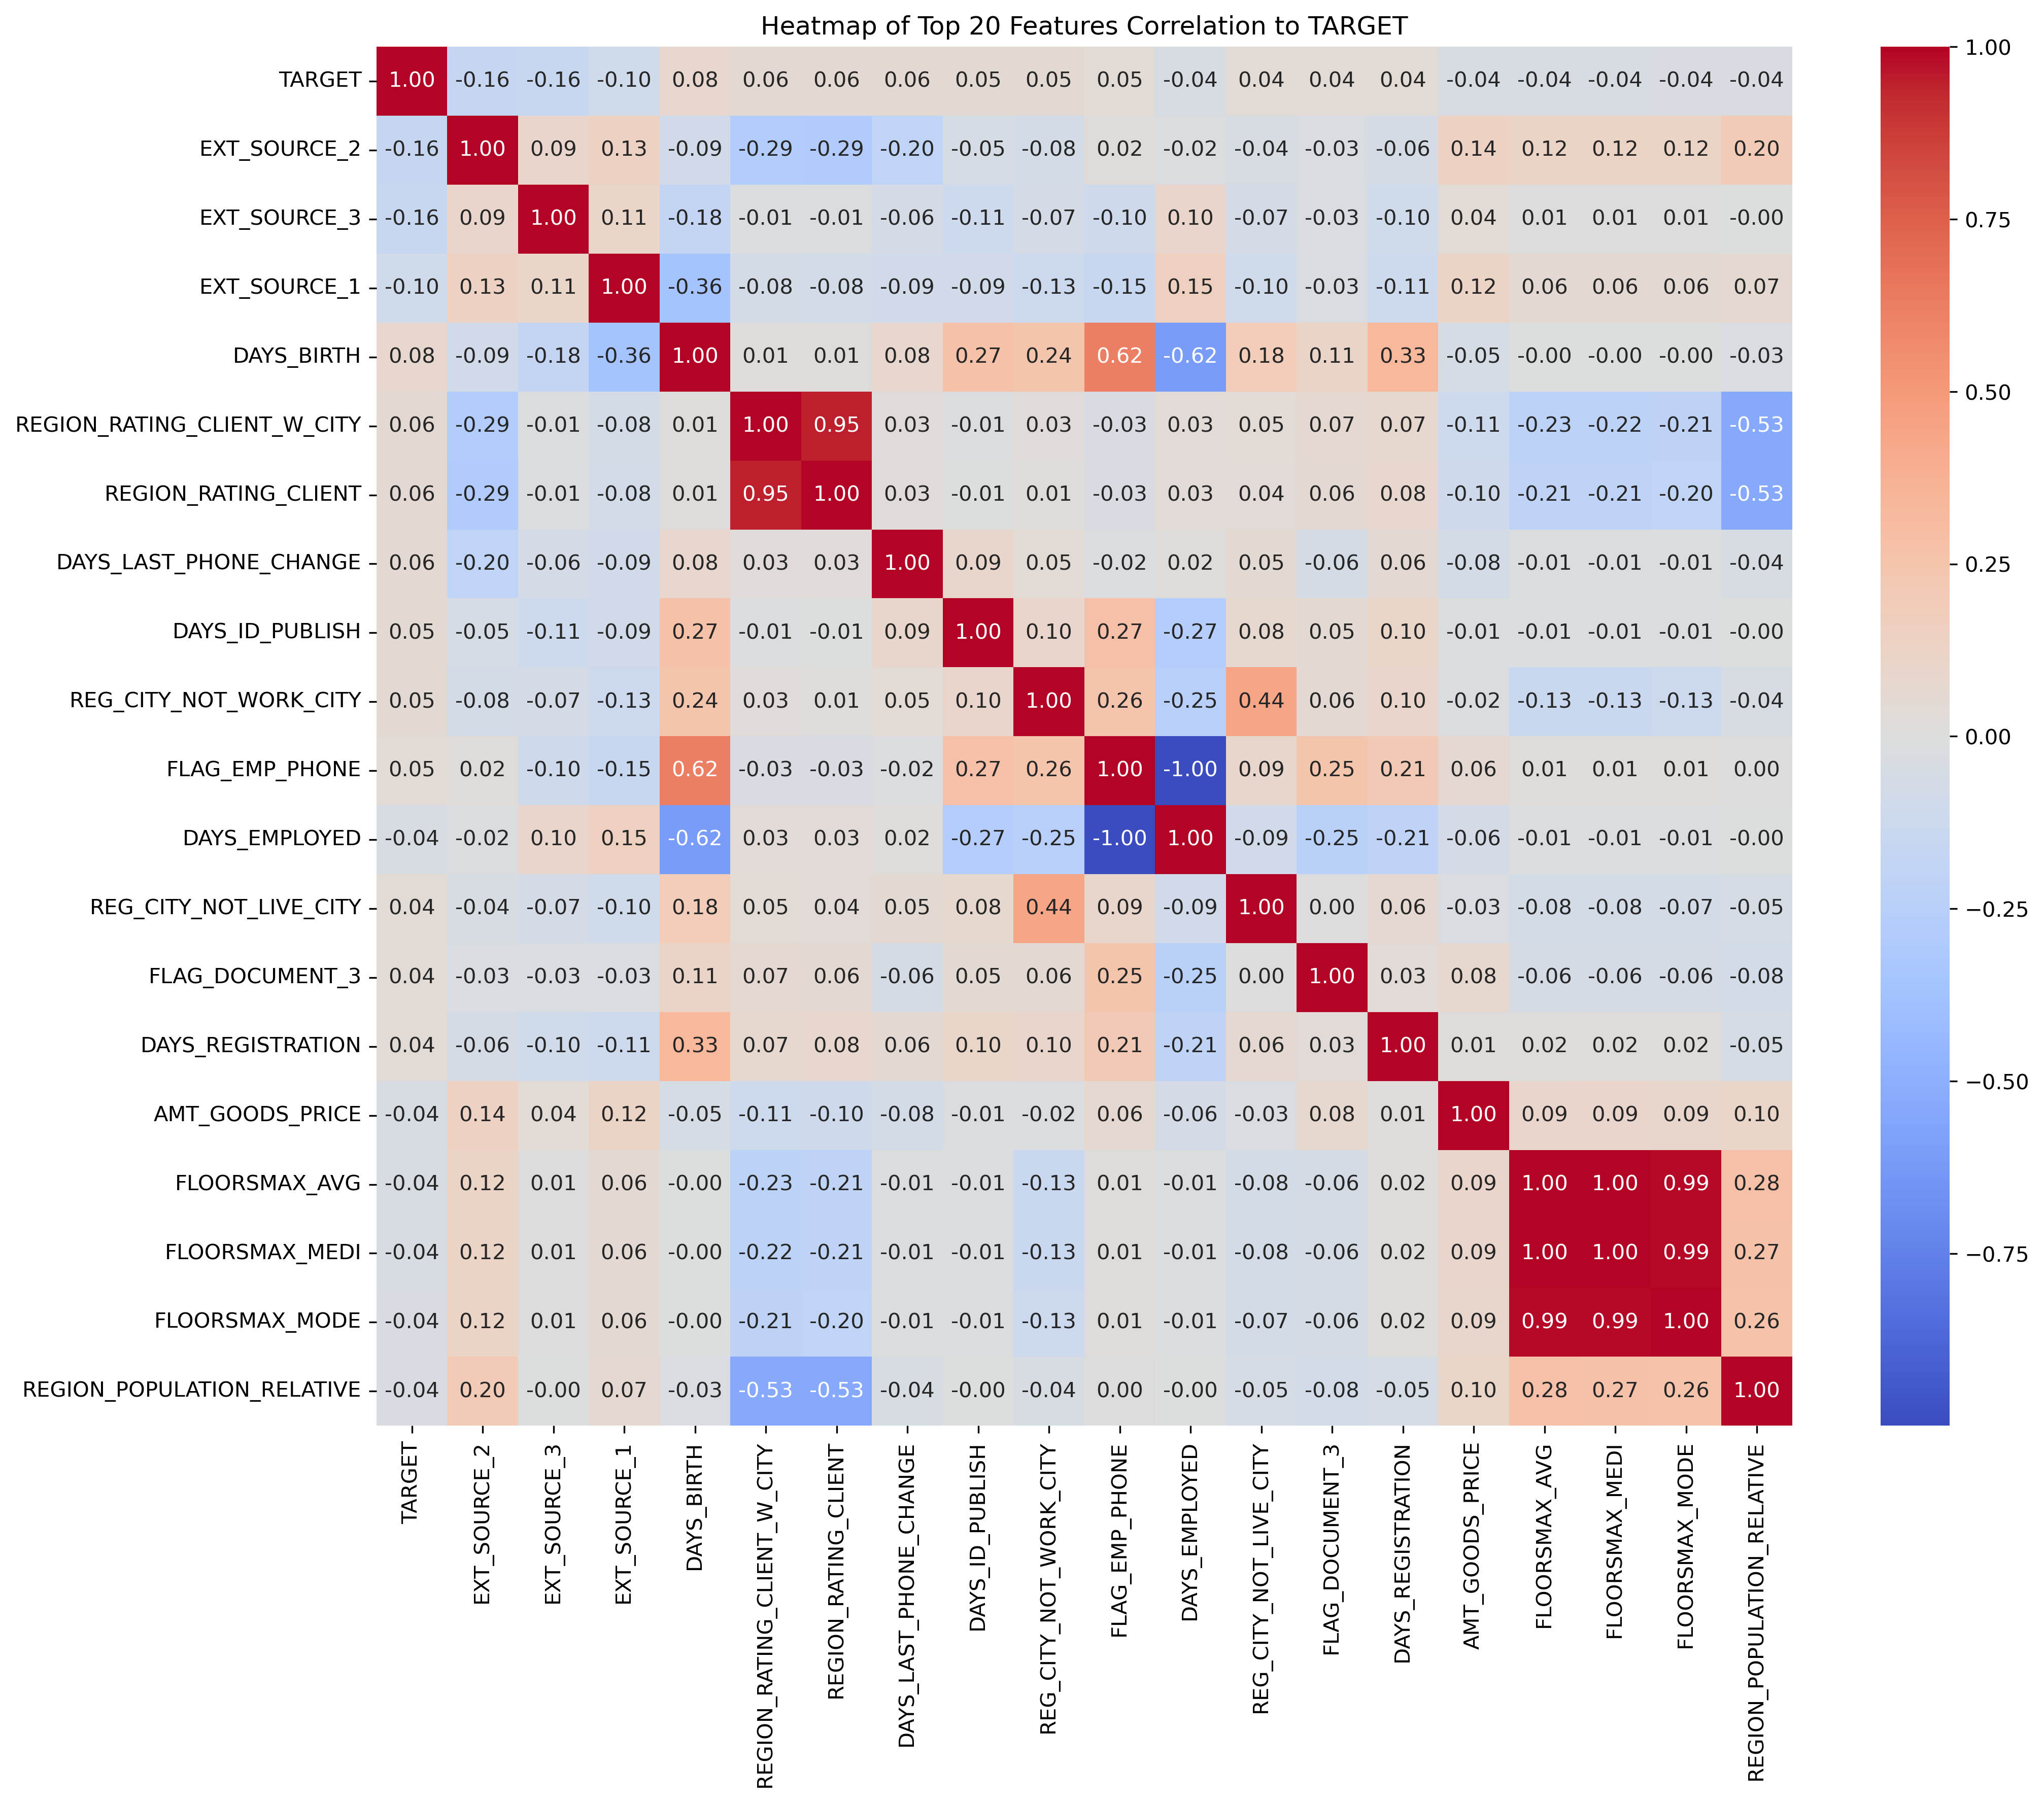

In [21]:
numerical_df= application_training_df.select_dtypes(include='number')

df_corr= numerical_df.corr()

corr_target = df_corr['TARGET'].abs()

# Get the top 20 features with the highest correlation to the target
top_20_features = corr_target.nlargest(20).index
top20_df = numerical_df[top_20_features]
top20_corr_matrix = top20_df.corr()

#plot heatmap
plt.figure(figsize=(15, 12), dpi=300)
sns.heatmap(top20_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Top 20 Features Correlation to TARGET')
plt.show()


The first thing that we will explore is the different loan types. The histogram below shows that most of the loan applications are for cash loans.

Text(0, 0.5, 'Count')

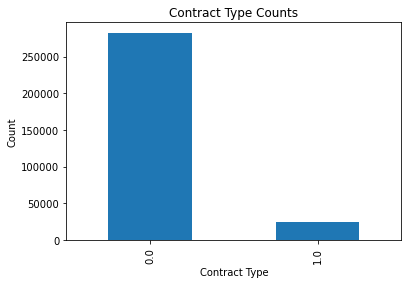

In [8]:
loanType=application_training_df['TARGET'].value_counts()
loanType.plot(kind='bar')
plt.xlabel('Contract Type')
plt.title('Contract Type Counts')
plt.ylabel('Count')

The data can be disaggregated by gender to explore if there is a difference in defaults based on gender. Below are 3 histograms showing the gender distribution, default status totals for each gender, and percentage of default rate for each gender. While the data contains a higher amount of females we are able to see that there is no significant difference in default rates based on gender.

Text(0.5, 1.0, 'Default Status Percentage by Gender')

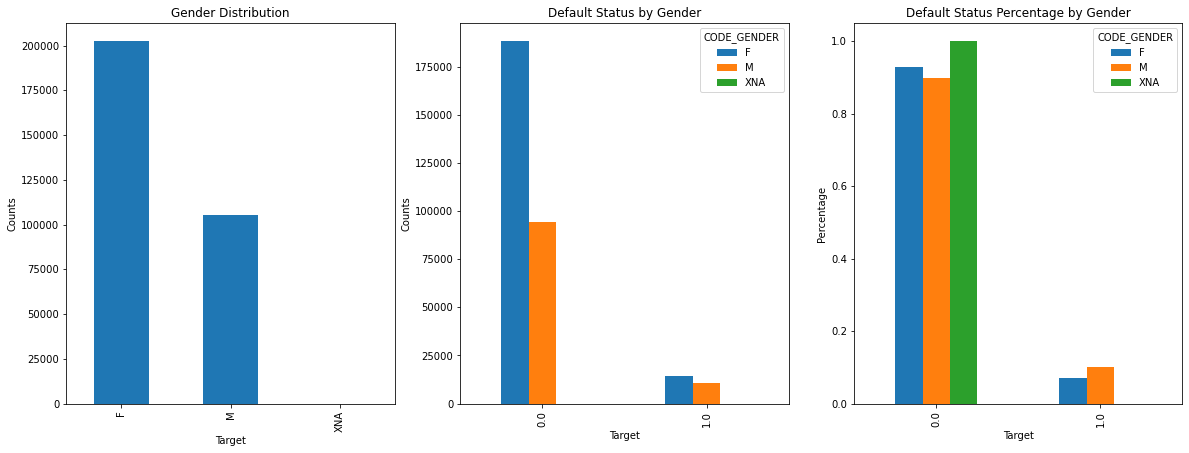

In [9]:
Genders=application_training_df['CODE_GENDER'].value_counts()
targetGender=application_training_df.groupby(['TARGET','CODE_GENDER']).size().unstack()
DefaultRateByGender= targetGender/Genders

fig, ax1 = plt.subplots(1,3, figsize=(20,7))

Genders.plot(kind='bar', ax=ax1[0])
ax1[0].set_xlabel('Target')
ax1[0].set_ylabel('Counts')
ax1[0].set_title('Gender Distribution')

targetGender.plot(kind='bar', ax=ax1[1])
ax1[1].set_xlabel('Target')
ax1[1].set_ylabel('Counts')
ax1[1].set_title('Default Status by Gender')

DefaultRateByGender.plot(kind='bar', ax=ax1[2])
ax1[2].set_xlabel('Target')
ax1[2].set_ylabel('Percentage')
ax1[2].set_title('Default Status Percentage by Gender')

Text(0.5, 1.0, 'Default Rate by Gender')

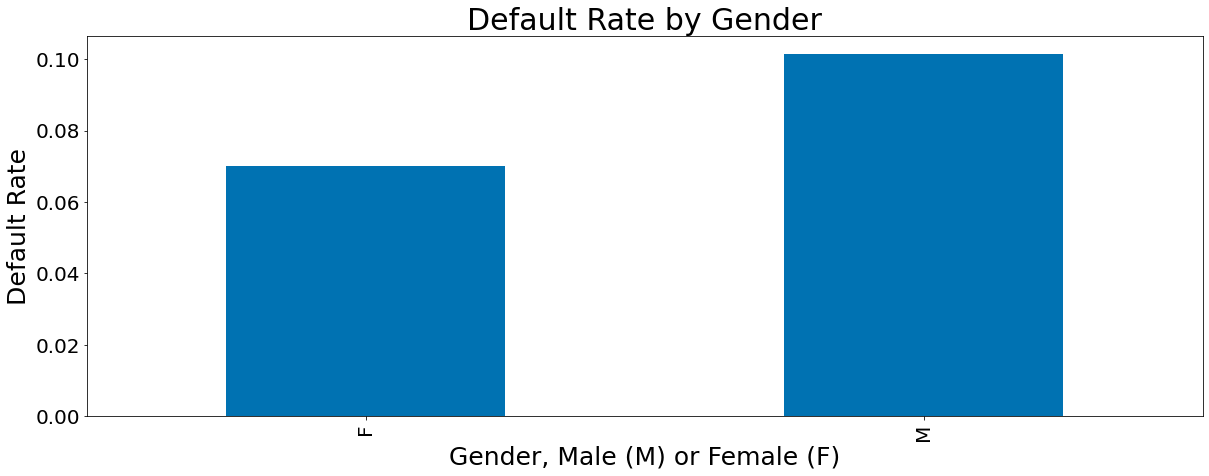

In [20]:

filtered_df = application_training_df[(application_training_df['CODE_GENDER'] == 'M') | (application_training_df['CODE_GENDER'] == 'F')]
genders = filtered_df['CODE_GENDER'].value_counts()

gender_target = application_training_df[application_training_df['TARGET'] == 1].groupby('CODE_GENDER').size()
gender_target_percentage= gender_target/genders

fig, ax1 = plt.subplots(1,1, figsize=(20,7))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=1)

gender_target_percentage.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Gender, Male (M) or Female (F)', fontsize=25)
ax1.set_ylabel('Default Rate', fontsize=25)
ax1.set_title('Default Rate by Gender', fontsize=30)

The CHILDREN_CNT feature provides the amount of children the applicant has. Lets explore to see how this might affect the abiity to repay loans. The histograms below allow us to see that the majority of applicants dont have any children and that default rates dont seem to be impacted by children count much but are slighlty higher as number of children goes up.

Text(0.5, 1.0, 'Default Status Percentage by Gender')

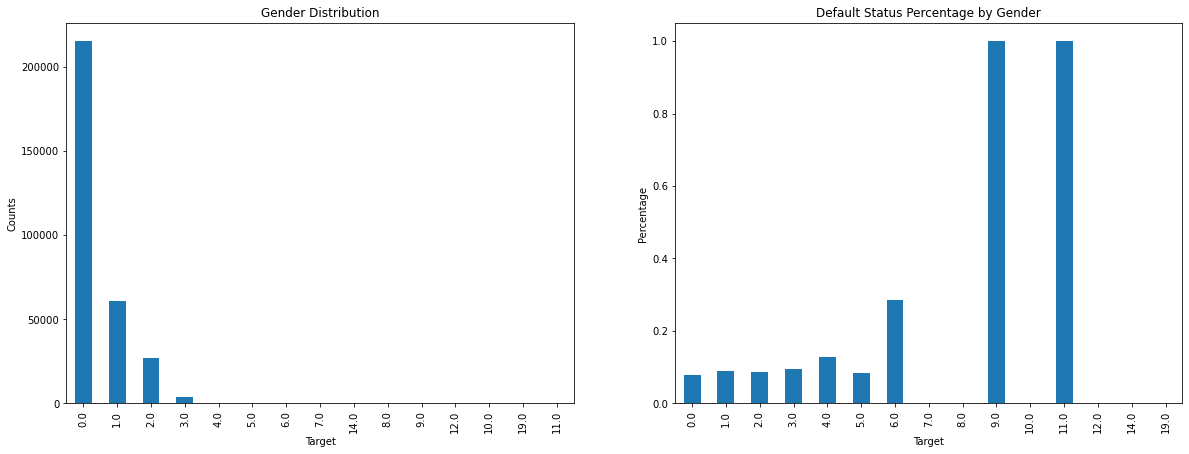

In [11]:
childrenCount=application_training_df['CNT_CHILDREN'].value_counts()
targetChildrenCount=application_training_df[application_training_df['TARGET'] == 1].groupby('CNT_CHILDREN').size()

DefaultRateByChildrenCount= targetChildrenCount/childrenCount

fig, ax1 = plt.subplots(1,2, figsize=(20,7))

childrenCount.plot(kind='bar', ax=ax1[0])
ax1[0].set_xlabel('Target')
ax1[0].set_ylabel('Counts')
ax1[0].set_title('Gender Distribution')

DefaultRateByChildrenCount.plot(kind='bar', ax=ax1[1])
ax1[1].set_xlabel('Target')
ax1[1].set_ylabel('Percentage')
ax1[1].set_title('Default Status Percentage by Gender')

Lets take a look at the own realty feature which is a feature about the applicants ownership of any real estate. If they own realty then they fall into the Y category and if they dont then its N. After plotting the distributon and default rates for each category we can see that their isnt a major difference in default but the applicants who own realty are less likely to default then those who dont.

Text(0.5, 1.0, 'Default Rate for Realty Owners')

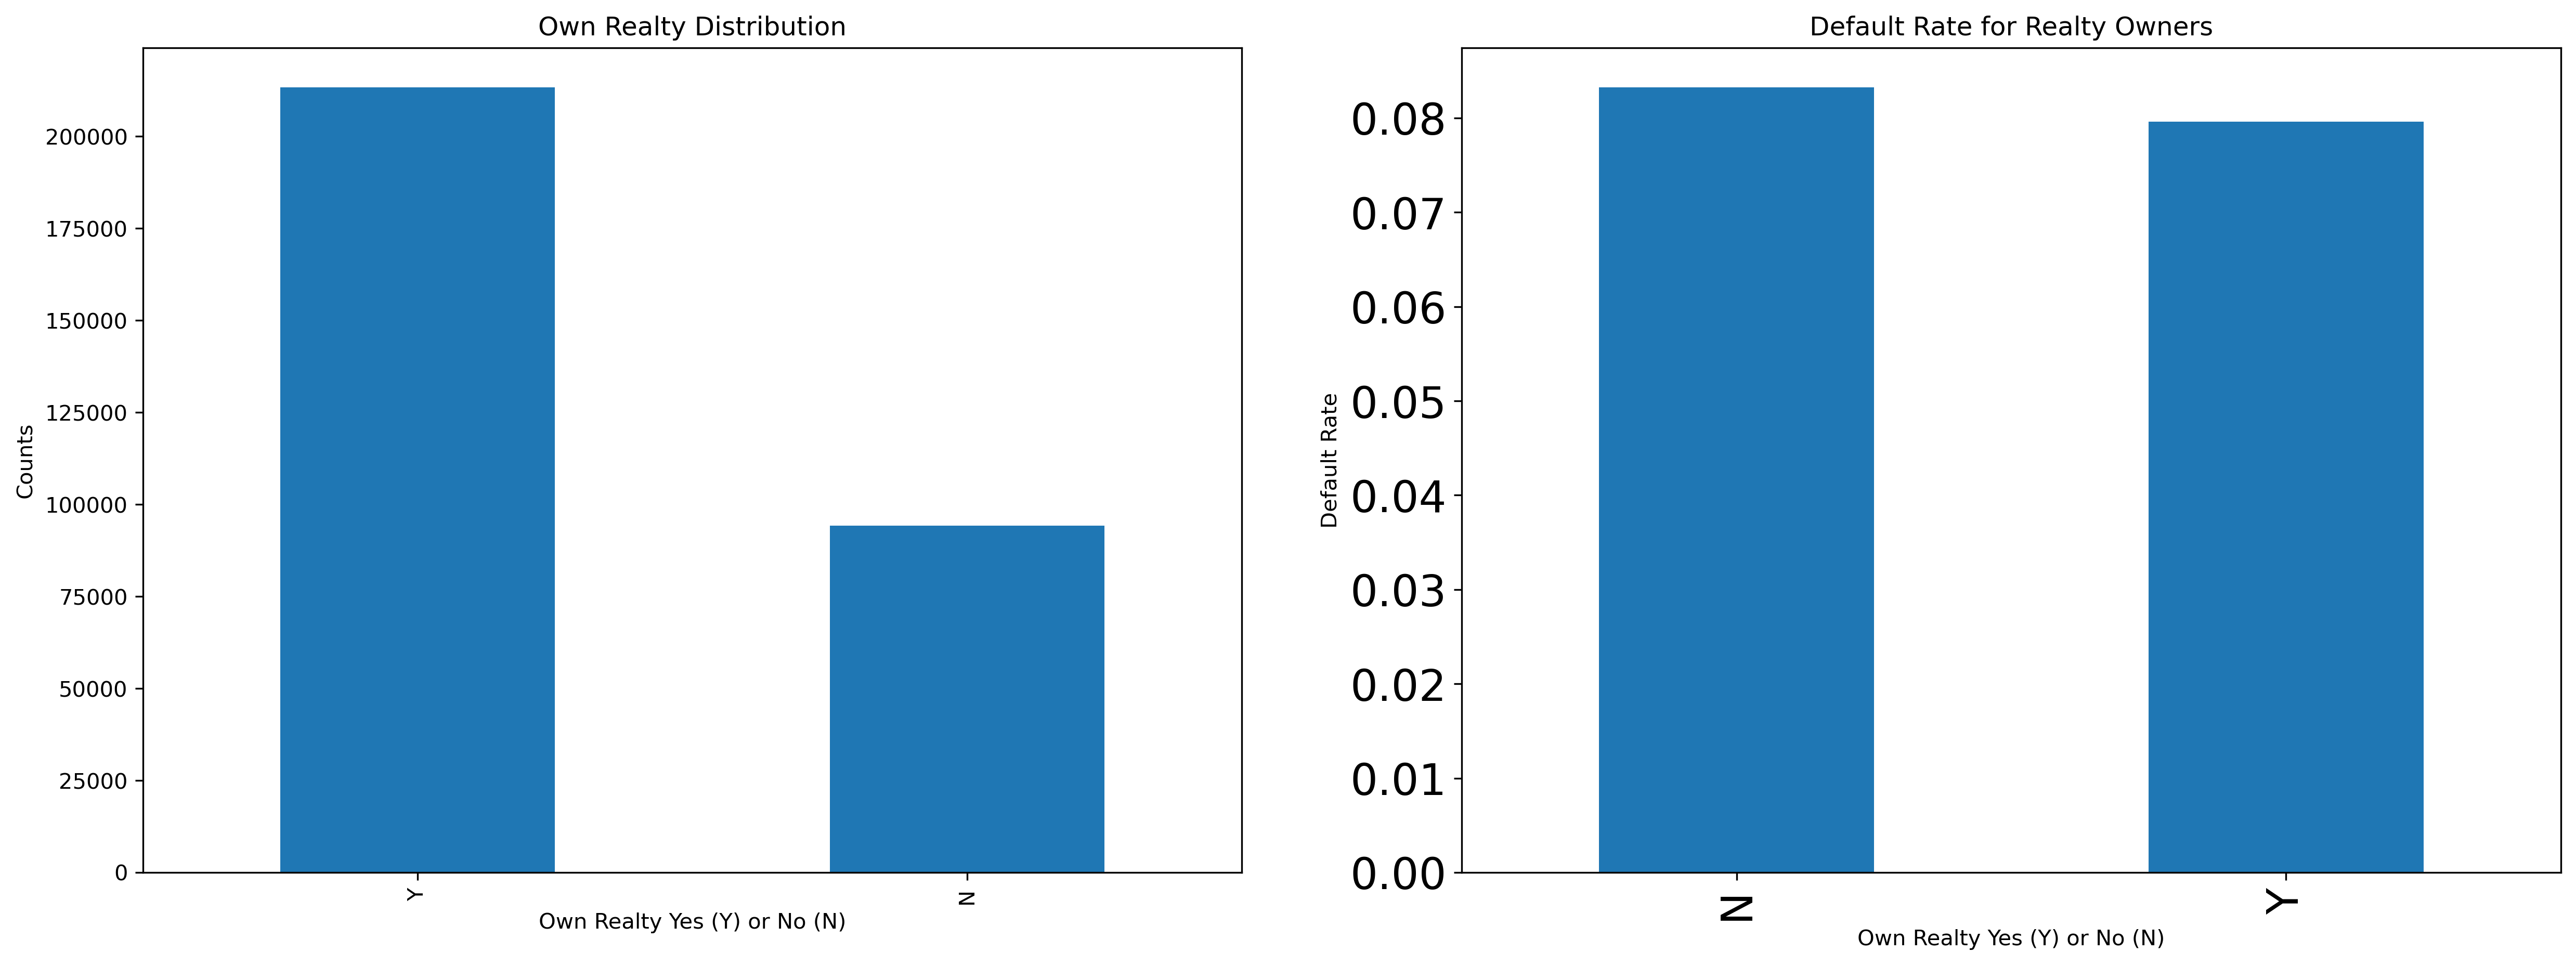

In [12]:
Realty=application_training_df['FLAG_OWN_REALTY'].value_counts()
realty_target = application_training_df[application_training_df['TARGET'] == 1].groupby('FLAG_OWN_REALTY').size()
realty_target_percentage= realty_target/Realty

fig, ax1 = plt.subplots(1,2, figsize=(20,7), dpi=300)

Realty.plot(kind='bar', ax=ax1[0])
ax1[0].set_xlabel('Own Realty Yes (Y) or No (N)')
ax1[0].set_ylabel('Counts')
ax1[0].set_title('Own Realty Distribution')
plt.xticks(fontsize=20)
plt.xticks(rotation=0)
plt.yticks(fontsize=20)
realty_target_percentage.plot(kind='bar', ax=ax1[1])
ax1[1].set_xlabel('Own Realty Yes (Y) or No (N)')
ax1[1].set_ylabel('Default Rate')
ax1[1].set_title('Default Rate for Realty Owners')



Text(0.5, 1.0, 'Default Rate for Realty Owners')

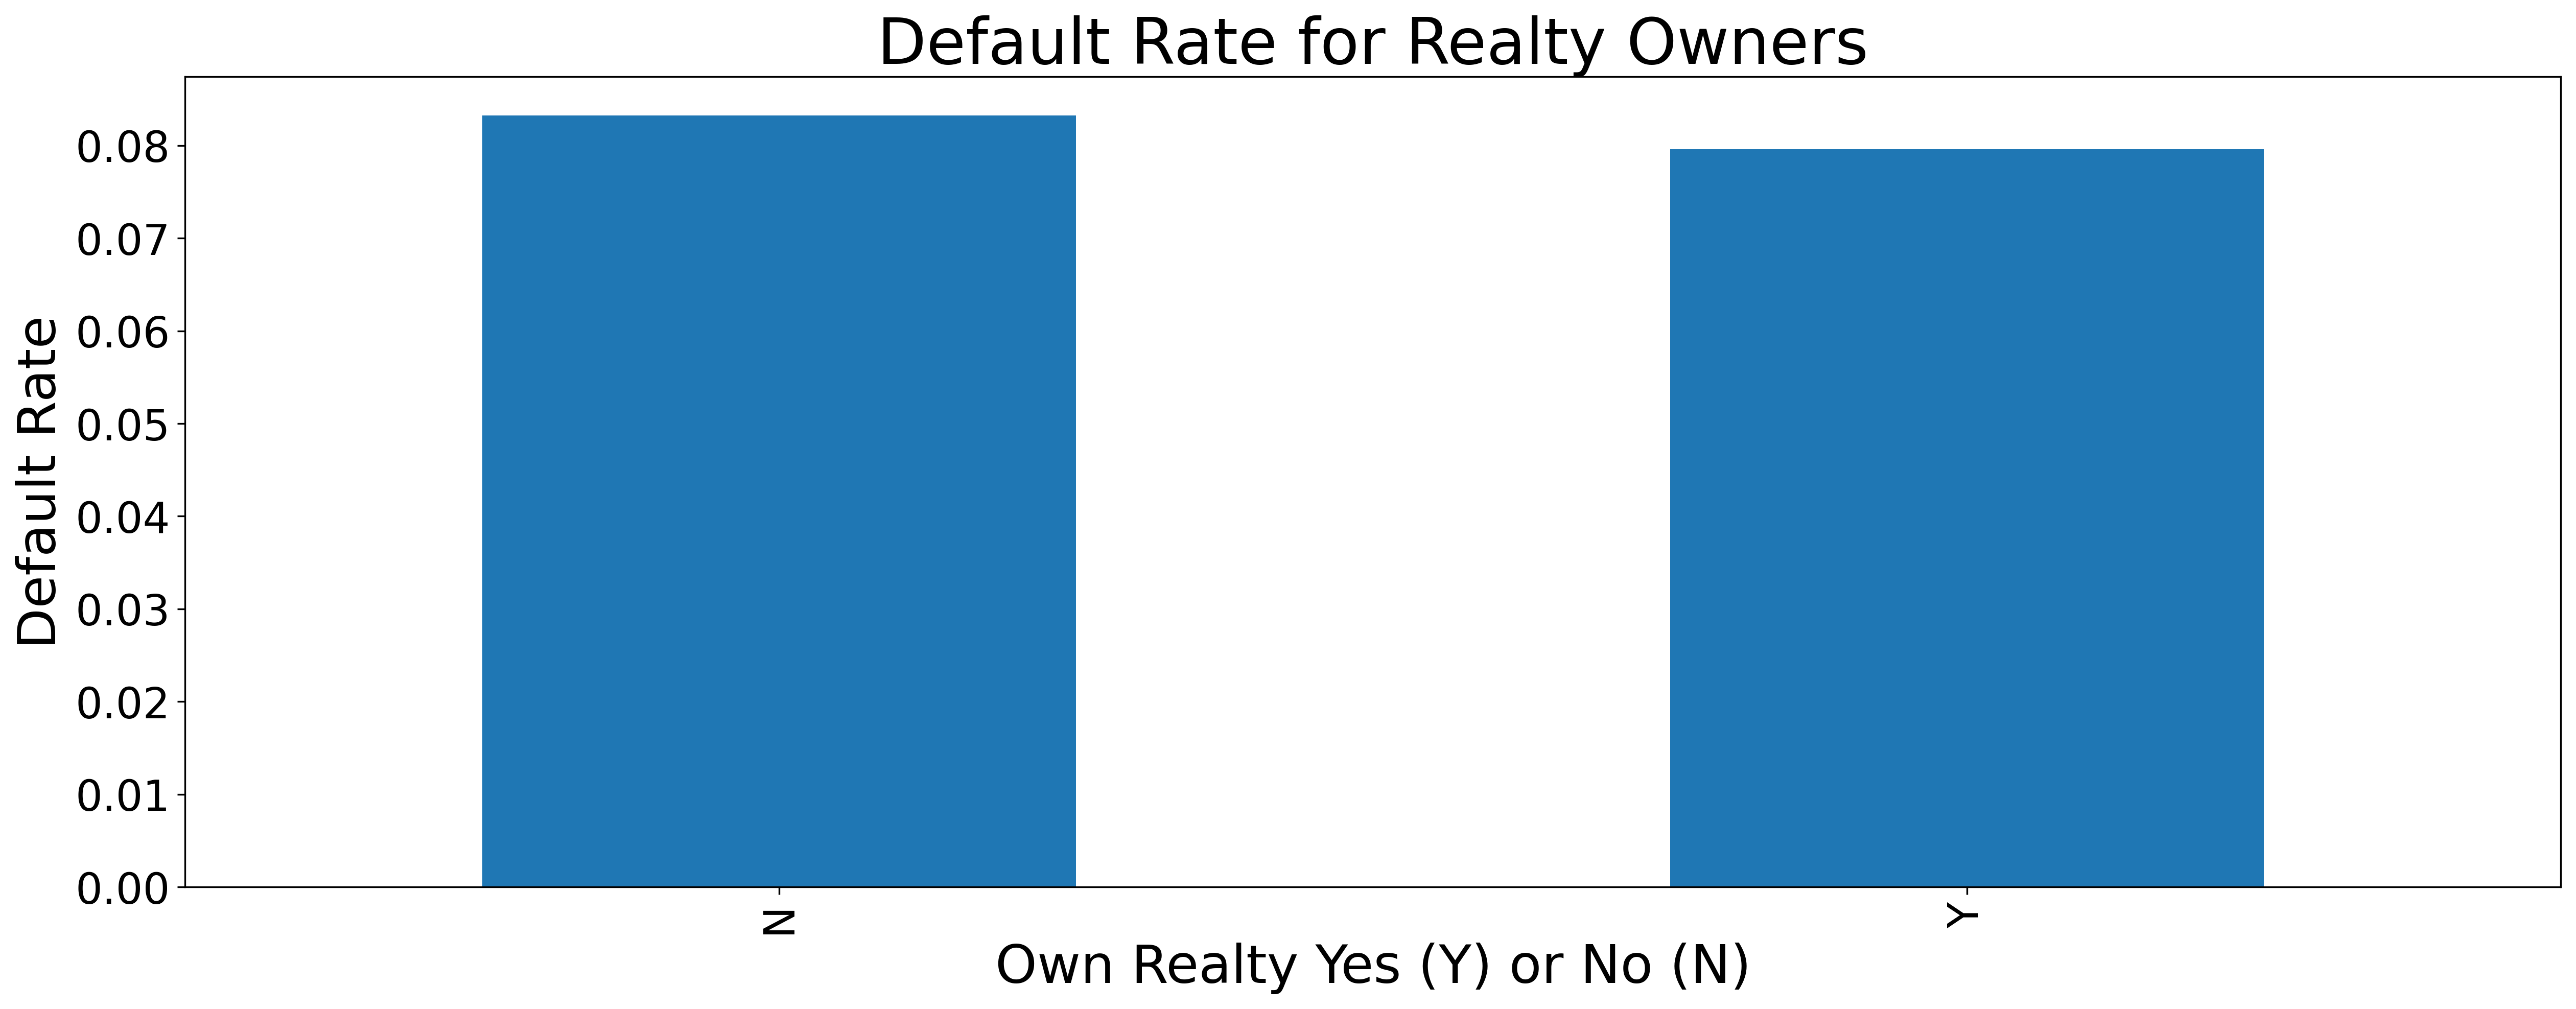

In [13]:
Realty=application_training_df['FLAG_OWN_REALTY'].value_counts()
realty_target = application_training_df[application_training_df['TARGET'] == 1].groupby('FLAG_OWN_REALTY').size()
realty_target_percentage= realty_target/Realty

fig, ax1 = plt.subplots(1,1, figsize=(20,7), dpi=300)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=1)
realty_target_percentage.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Own Realty Yes (Y) or No (N)', fontsize=25)
ax1.set_ylabel('Default Rate', fontsize=25)
ax1.set_title('Default Rate for Realty Owners', fontsize=30)


Distribution of AMT_CREDIT, which is the amount that the bank has credited to the borrower, the plot below shows the distribution for both target values of loans that were repaid and those that were not to see if there is a differnece based on the loan amount.

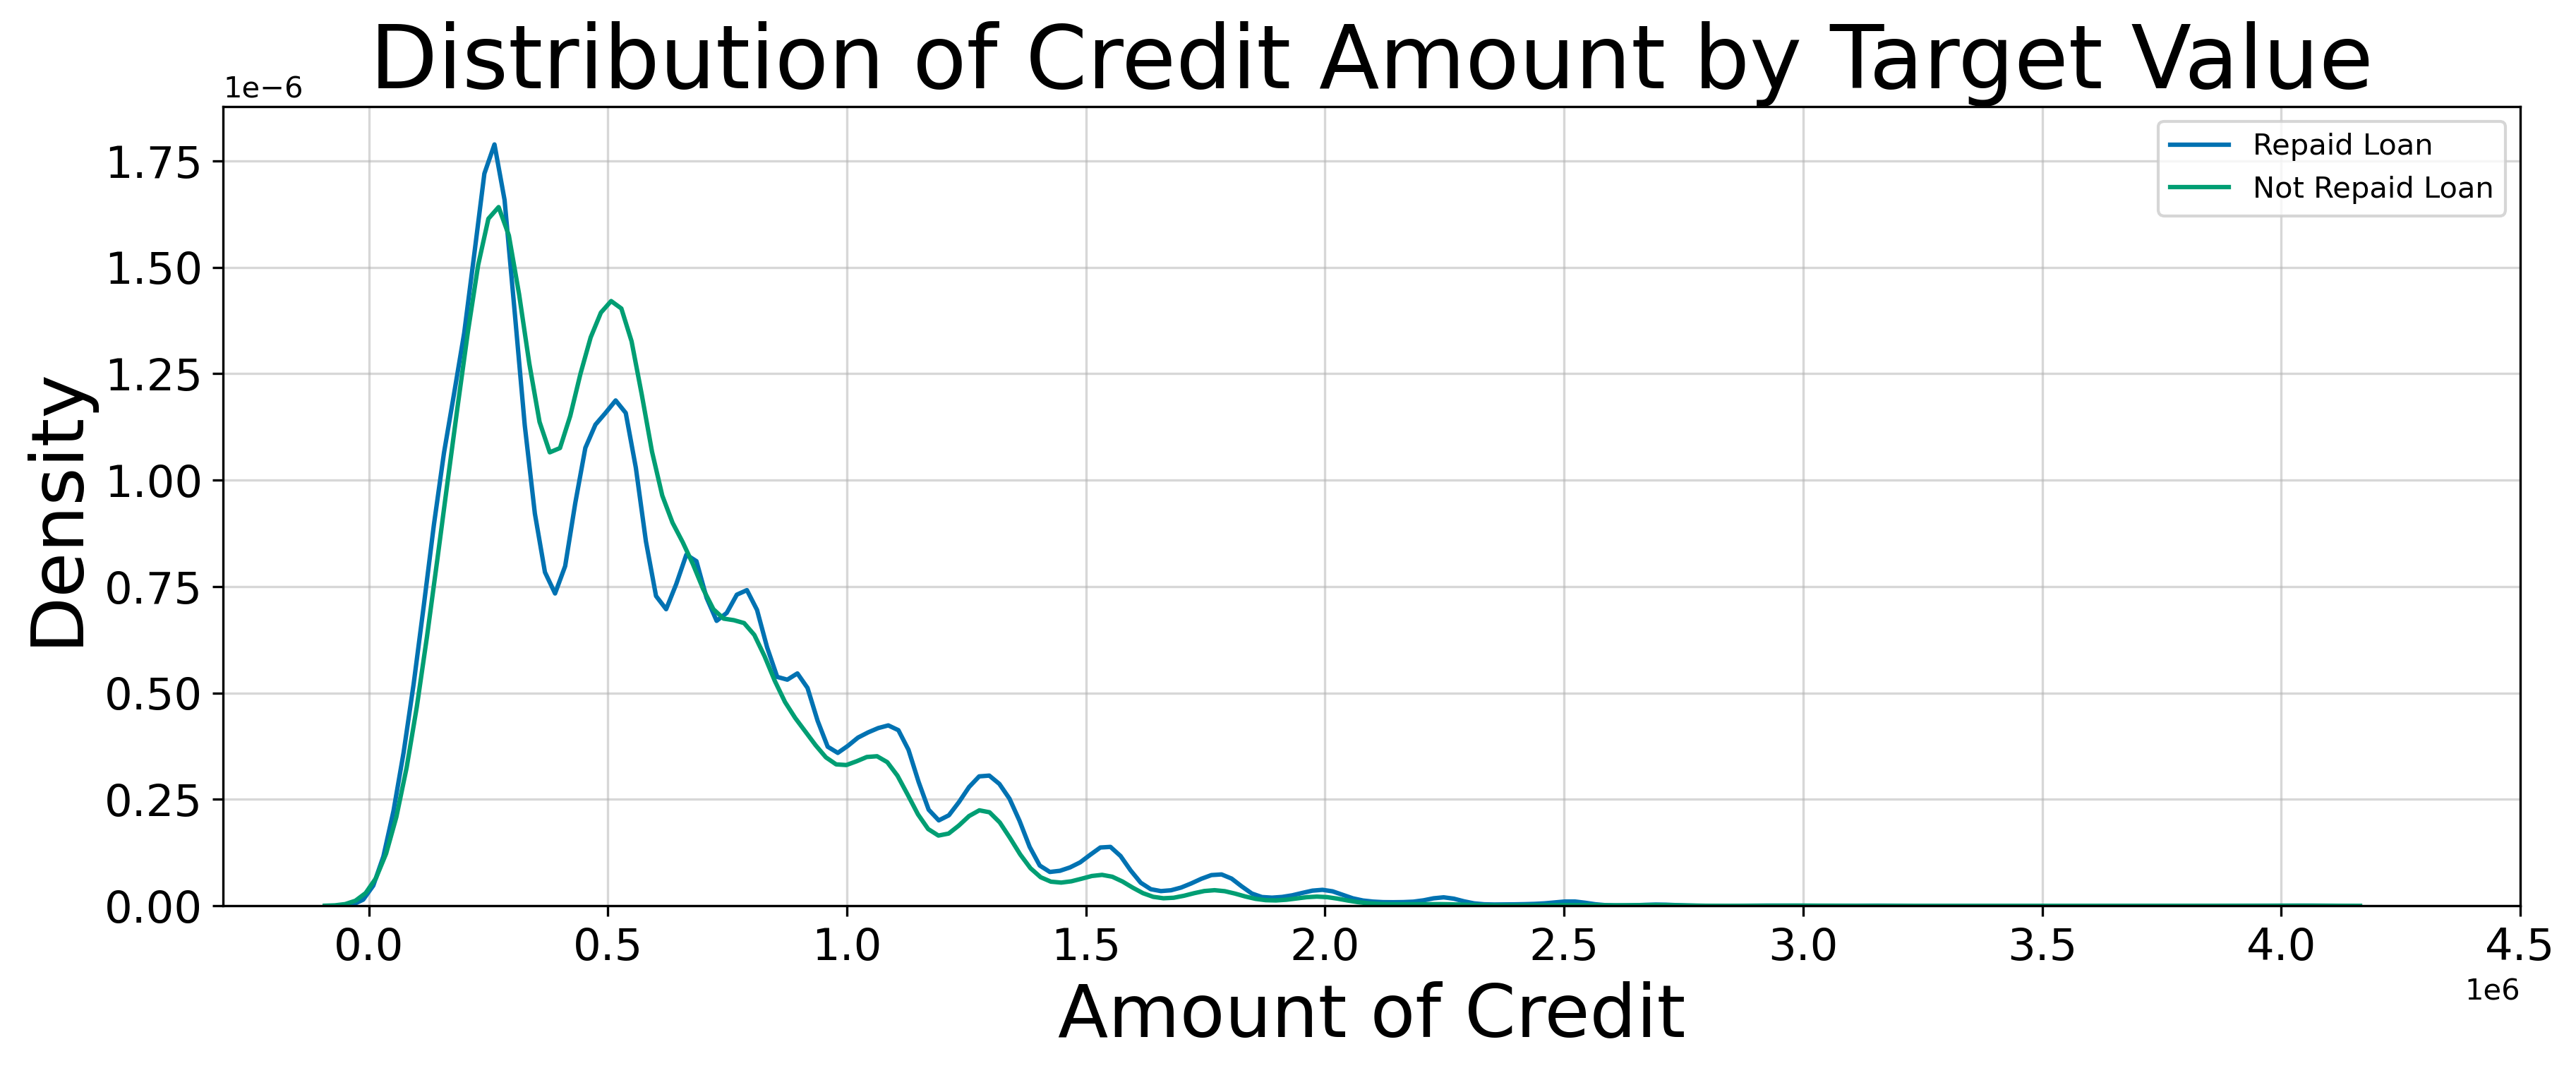

In [25]:
import numpy as np
plt.figure(figsize=(14,5), dpi=300)
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(application_training_df.loc[application_training_df['TARGET'] == 0, 'AMT_CREDIT'],
            label = 'Repaid Loan')
sns.kdeplot(application_training_df.loc[application_training_df['TARGET'] == 1, 'AMT_CREDIT'],
            label = 'Not Repaid Loan')
plt.xlabel('Amount of Credit', fontsize=25)
plt.xticks(np.arange(0, 5000000, 500000), fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Density', fontsize=25)
plt.title('Distribution of Credit Amount by Target Value', fontsize=30)
plt.legend()

One of the main subquestions we will be exploring is if whether there is a correlation between default and a borrowers education level. Below are 3 histograms, the first showing a distribution of the different education levels in the data and the second one shows what default target status those applicants fall in and grouped by their eductaion level, since the data is not evenly distributed for the education levels we use the 3rd histogram to show the percentages for each education level group on default/non default.

We are able to see that the 'Lower Secondary' age group has the highest default rate and 'Academic Degree' has the lowest.

Text(0.5, 1.0, 'Default Status Percentage by Education')

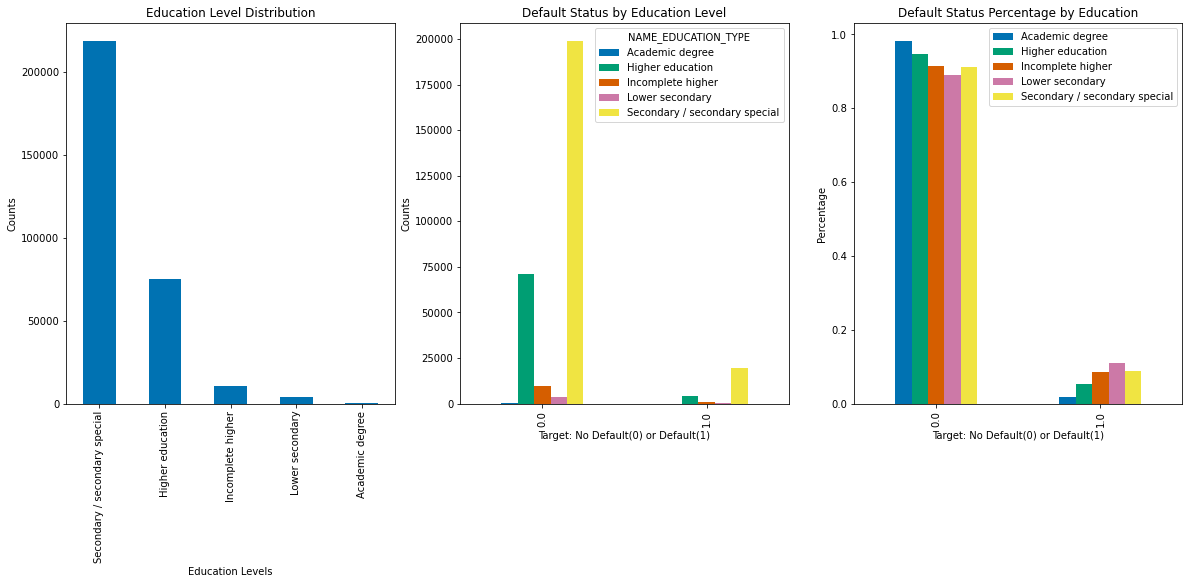

In [ ]:
EducationType=application_training_df['NAME_EDUCATION_TYPE'].value_counts()
EducationTarget=application_training_df.groupby(['TARGET','NAME_EDUCATION_TYPE']).size().unstack()

EducationTargetPercentage=EducationTarget/EducationType
fig, ax1 = plt.subplots(1,3, figsize=(20,7))

EducationType.plot(kind='bar', ax=ax1[0])
ax1[0].set_xlabel('Education Levels')
ax1[0].set_ylabel('Counts')
ax1[0].set_title('Education Level Distribution')

EducationTarget.plot(kind='bar', ax=ax1[1])
ax1[1].set_xlabel('Target: No Default(0) or Default(1)')
ax1[1].set_ylabel('Counts')
ax1[1].set_title('Default Status by Education Level')

EducationTargetPercentage.plot(kind='bar', ax=ax1[2])
ax1[2].set_xlabel('Target: No Default(0) or Default(1)')
ax1[2].set_ylabel('Percentage')
ax1[2].set_title('Default Status Percentage by Education')

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

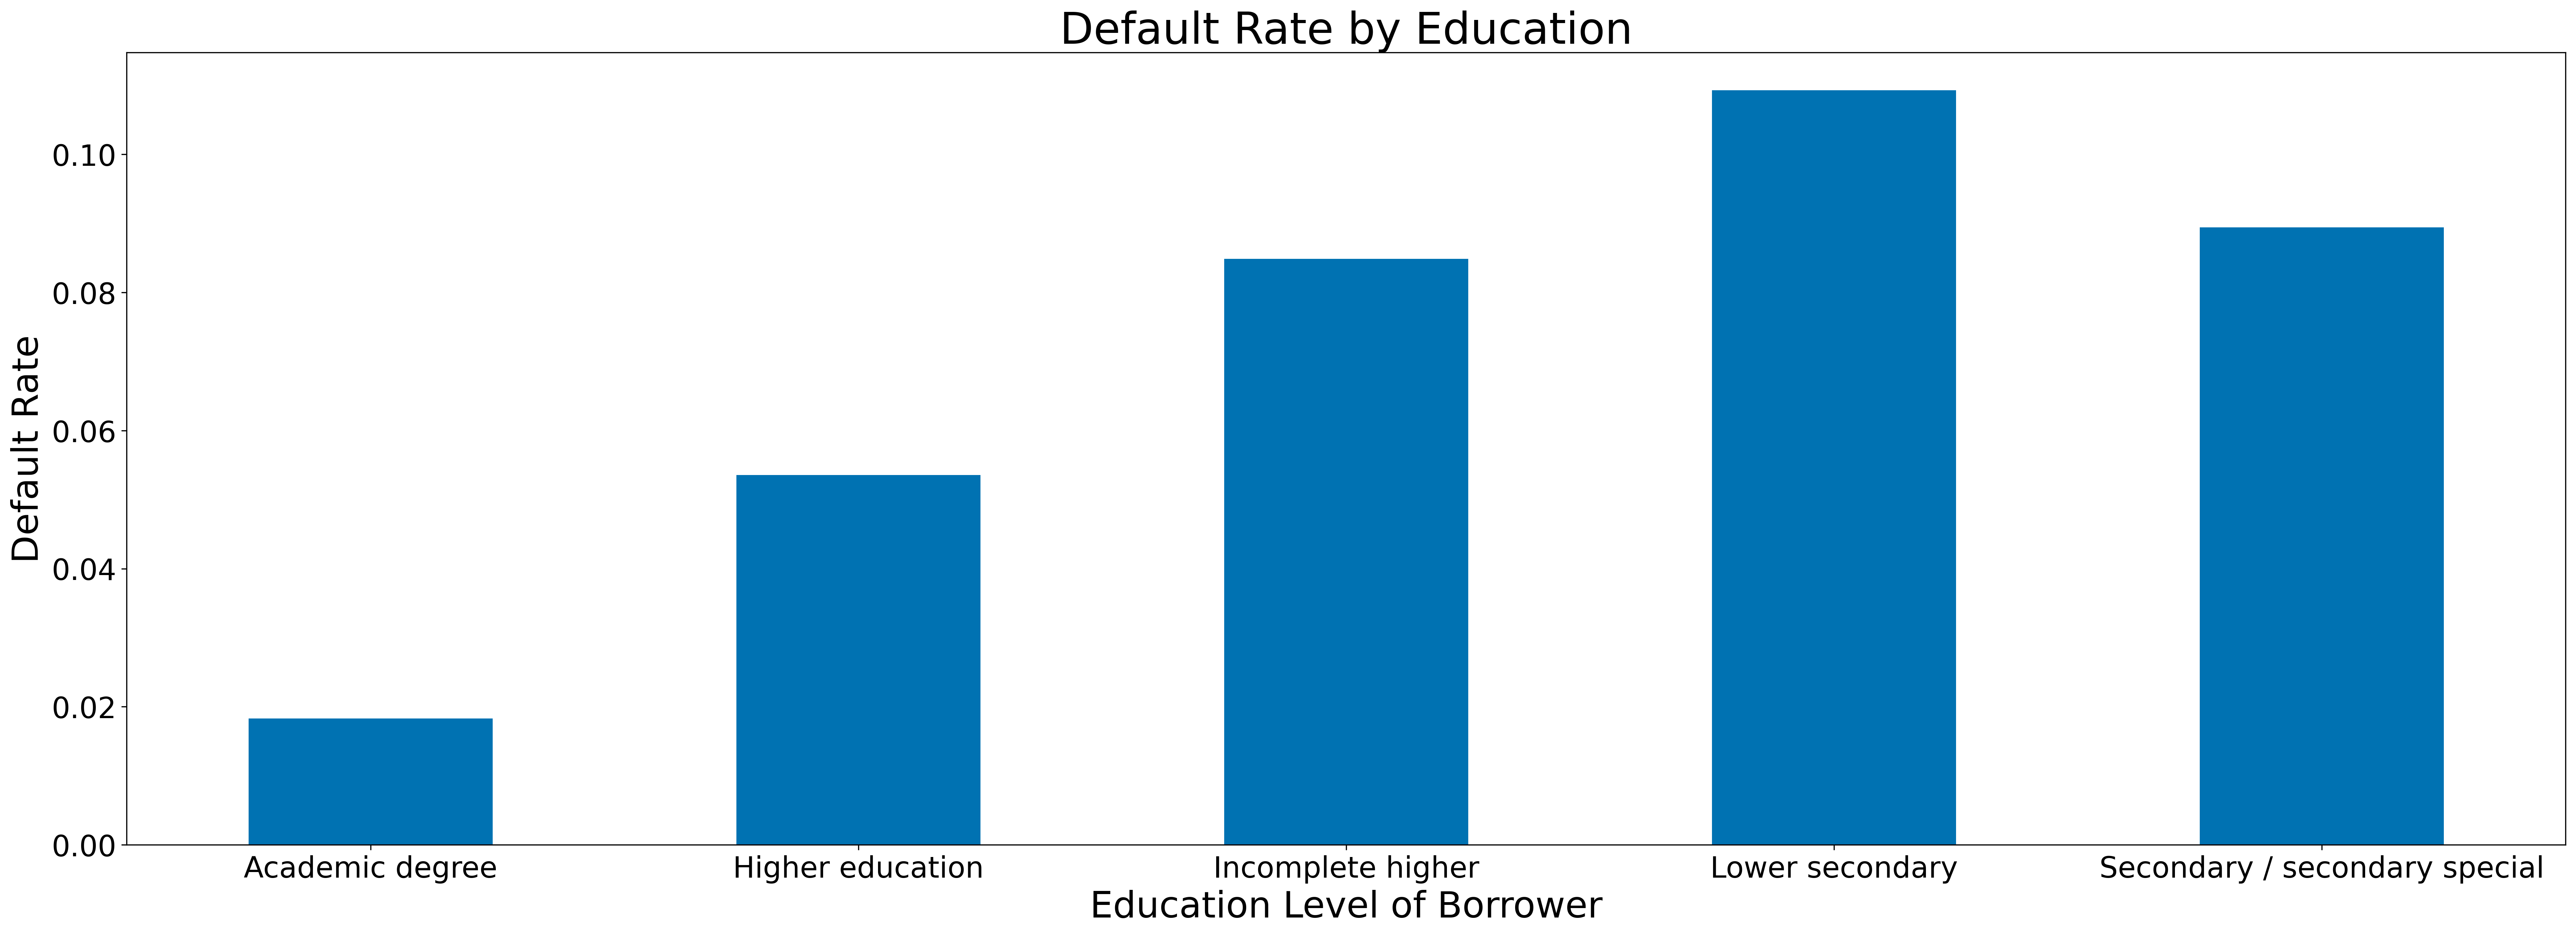

In [ ]:

EducationTarget=application_training_df.groupby(['TARGET','NAME_EDUCATION_TYPE']).size().unstack()

EducationTargetPercentage=EducationTarget/EducationType
EducationTarget_Target1 = EducationTarget.loc[1]

EductaionTargetPercentage1=EducationTarget_Target1/EducationType
#colors=['red','blue','green','orange', 'yellow']
plt.figure(figsize=(30,10),dpi=300)
EductaionTargetPercentage1.plot(kind='bar')
plt.xlabel('Education Level of Borrower', fontsize=25)
plt.ylabel('Default Rate', fontsize=25)
plt.title('Default Rate by Education', fontsize=30)
plt.xticks(rotation=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

Another question we will be looking at is whether age effects a borrowers likelhood to default. Currently the only feature we have is DAYS_BIRTH which provides the days of birth of applicant, using this we will create a Age feature. The histogram below shows the distribution of Ages in years in the data.

Text(0.5, 1.0, 'Age Distribution')

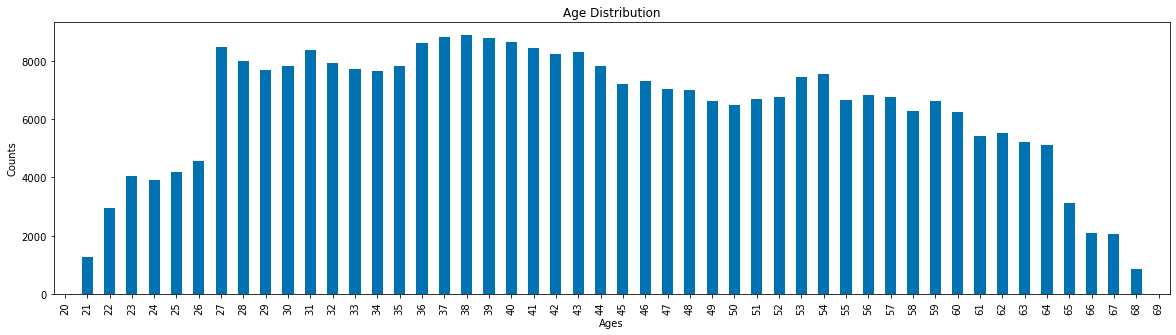

In [ ]:
#Creates new feature YEARS_BIRTH using DAYS_BIRTH and then rounding down
application_training_df['YEARS_BIRTH']=(application_training_df['DAYS_BIRTH'] //-365).astype(int)

Ages = sorted(application_training_df['YEARS_BIRTH'].unique())
age_counts = application_training_df['YEARS_BIRTH'].value_counts().loc[Ages]

plt.figure(figsize=(20,5))
age_counts.plot(kind='bar')
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.title('Age Distribution')

Our goal is so see if certain ages have higher defaault rates then others. The histogram below shows the default percentages for each age in years. This allows us to visually see that younger ages have higher default rates then older borrowers.

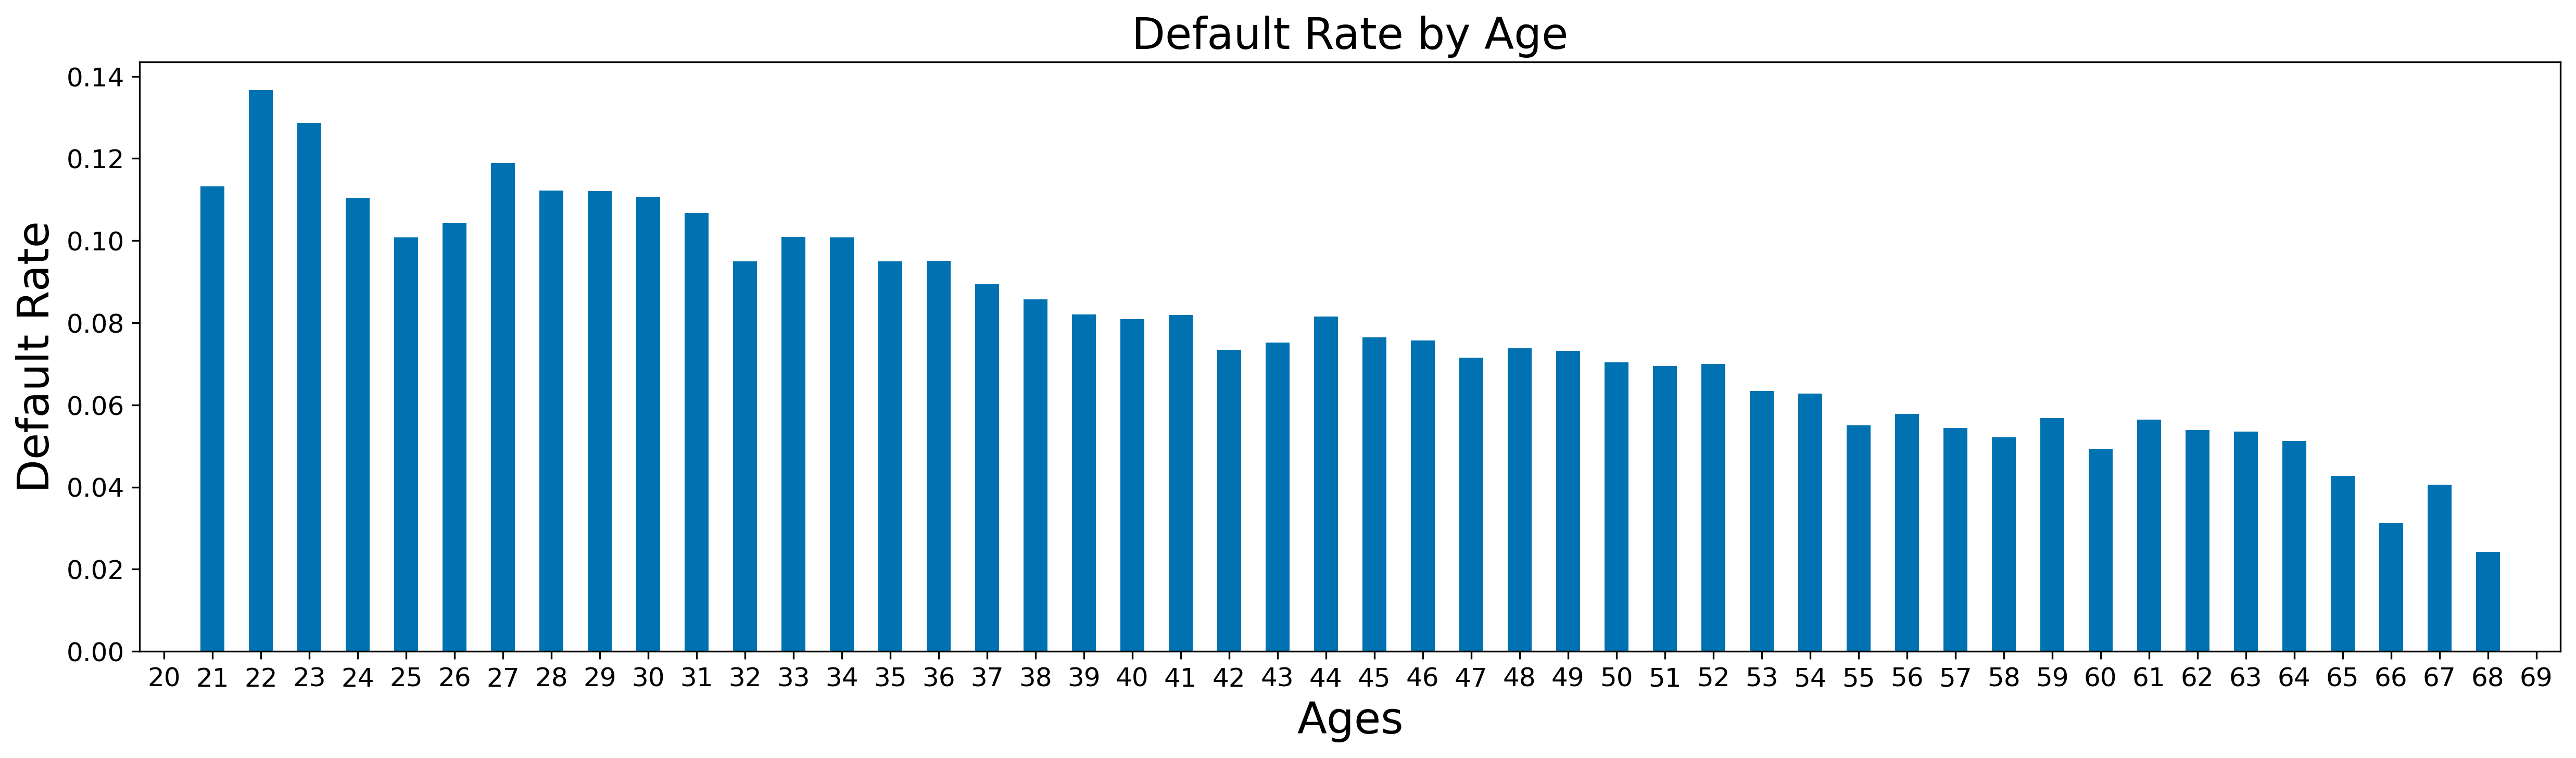

: 

In [ ]:
from matplotlib.ticker import PercentFormatter
Agetarget=application_training_df.groupby(['TARGET','YEARS_BIRTH']).size().unstack()
age_target_counts = application_training_df[application_training_df['TARGET'] == 1].groupby('YEARS_BIRTH').size()

age_target_percentage= age_target_counts/age_counts
plt.figure(figsize=(20,5), dpi=300)
age_target_percentage.plot(kind='bar')
plt.xlabel('Ages', fontsize='20')
plt.ylabel('Default Rate', fontsize=20)
plt.title('Default Rate by Age', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=0)

plt.show()

We can create another histogram to visualize the data in age groups. We will use 5 years as a bucket which gives us 8 groups, this allows for a quicker visualization to view how age effects defaut rates.

Text(0.5, 1.0, 'Default Rate by Age Groups')

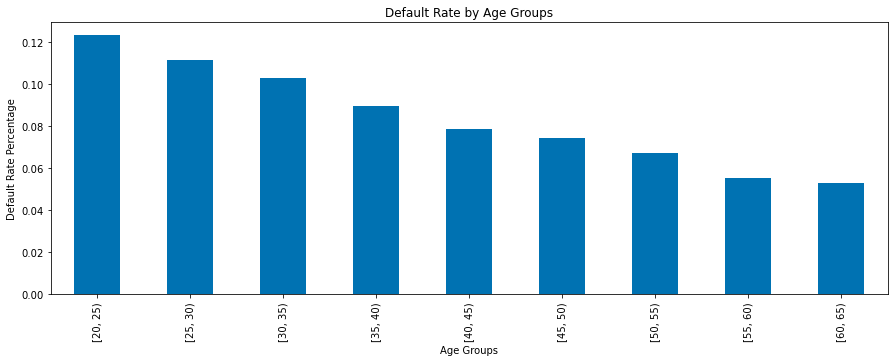

In [ ]:
application_training_df['AGE_GROUP'] = pandas.cut(application_training_df['YEARS_BIRTH'], bins=range(20, 70, 5), right=False)
age_counts = application_training_df['AGE_GROUP'].value_counts()
age_target_counts = application_training_df[application_training_df['TARGET'] == 1].groupby('AGE_GROUP').size()

# default % for age groups
age_target_percentage = age_target_counts / age_counts

# Plotting
plt.figure(figsize=(15, 5))
age_target_percentage.plot(kind='bar')
plt.xlabel('Age Groups')
plt.ylabel('Default Rate Percentage')
plt.title('Default Rate by Age Groups')


The categorcial features need to be transformed to numerical for machine learning, we will use One Hot Encoding to do this.

In [ ]:
OHC=OneHotEncoder(handle_unknown='ignore')

#get categorcial features
categorical_features = application_training_df.select_dtypes(include=['object']).columns

# Fit and transform using one hot encoder
encoded_features = OHC.fit_transform(application_training_df[categorical_features]).toarray()

df_encoded = pandas.DataFrame(encoded_features, columns=OHC.get_feature_names_out(categorical_features), index=application_training_df.index)

train_application_df= application_training_df.merge(df_encoded, left_index=True, right_index=True)

# Drop all of orignial categorical features as they will not be needed
train_application_df.drop(categorical_features, axis=1, inplace=True)

train_application_df.shape

(307511, 248)

After transforming the categorical features to numerical we get a dataset of 248 features and it is now ready to be used for machine learning.

In [ ]:
train_application_df=train_application_df.drop(columns=['AGE_GROUP'])

In [ ]:
X_train= train_application_df.drop(columns=['TARGET'])
y_train=train_application_df['TARGET']